# Описательные статистики: меры центральной тенденции

In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Меры центральной тенденции**

**Мера центральной тенденции** - такое значение, которое находится в центре распределения и наилучшим способом описывает *типичное* наблюдение из данных

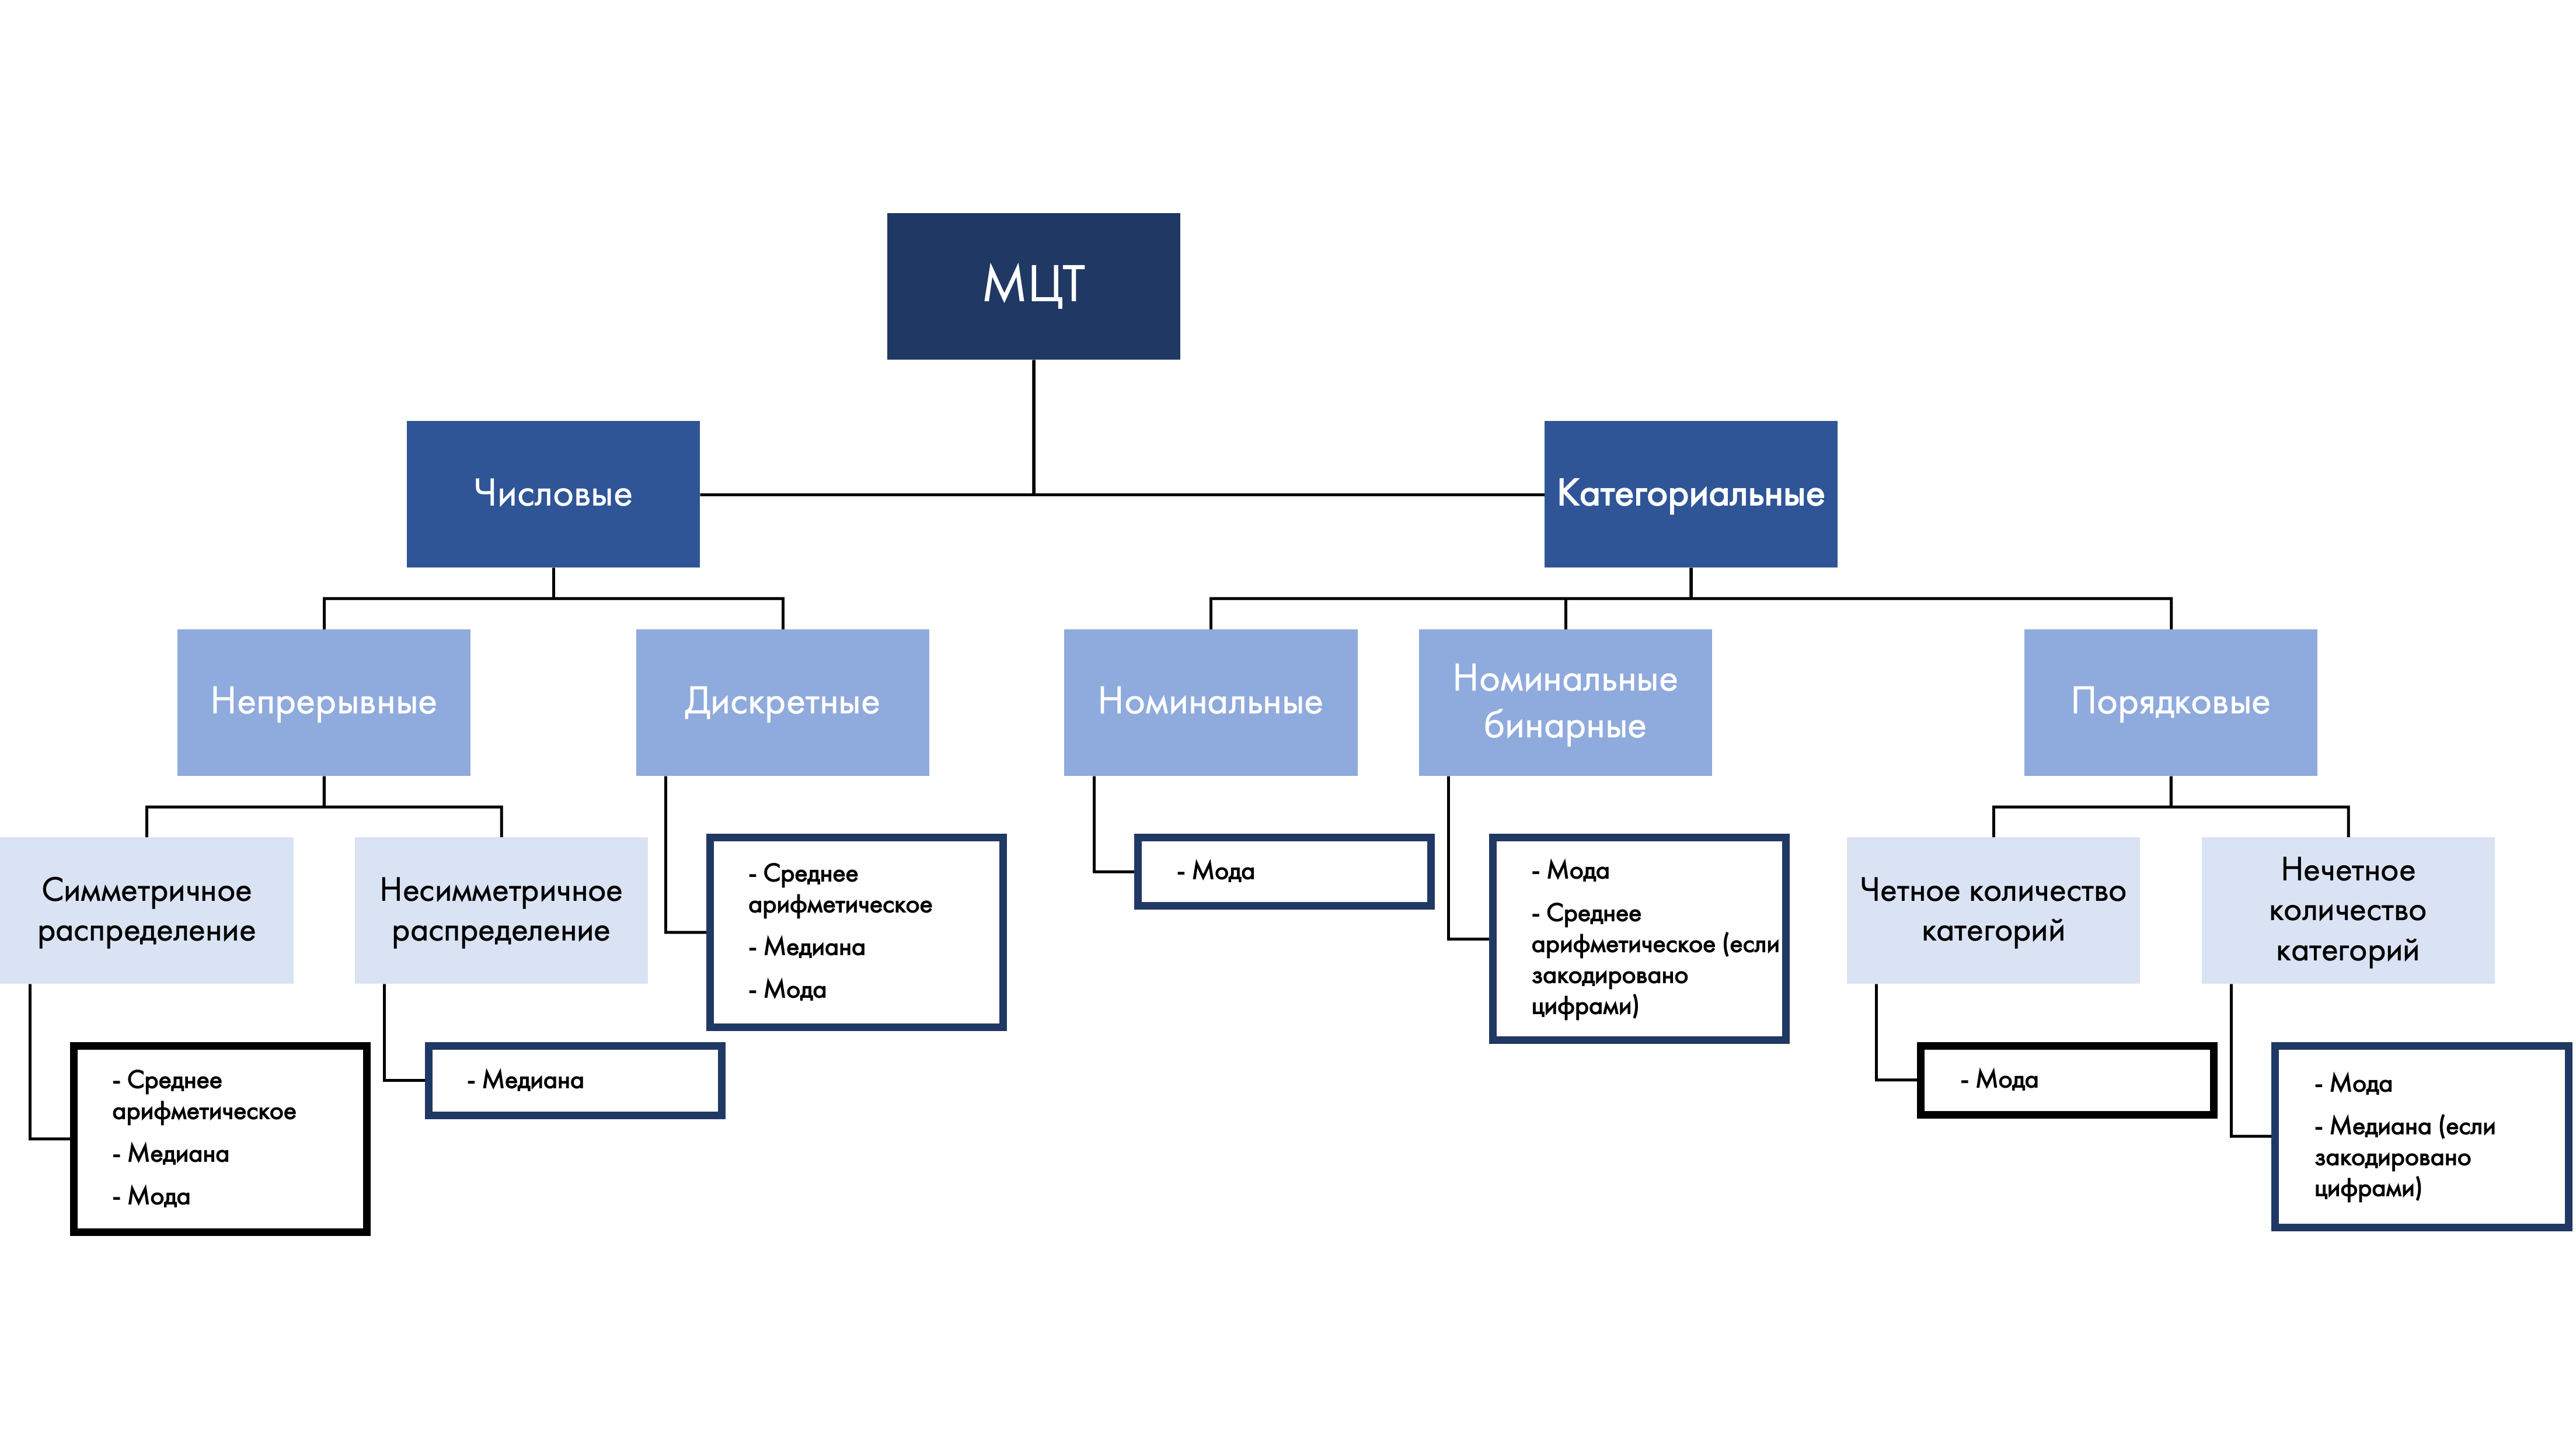

### Среднее арифметическое `.mean()`

**Среднее арифметическое** - число, равное сумме всех чисел выборки или генеральной совокупности, деленной на их количество

$$
\bar {x} =  \frac {1}{n} \sum _{i=1}^{n}x_{i}
$$

<img src="https://www.litres.ru/pub/t/28731109.json/i_005.jpg" width = 300>

*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

In [ ]:
df['Age'].mean()

29.69911764705882

### Медиана `.median()`

**Медиана** - это точка ниже и выше которой находится ровно по 50% значений в распределении

<img src = "https://www.litres.ru/pub/t/28731109.json/i_003.jpg" width = 500>
<img src = "https://www.litres.ru/pub/t/28731109.json/i_004.jpg" width = 500>

*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

In [ ]:
df['Age'].median()

28.0

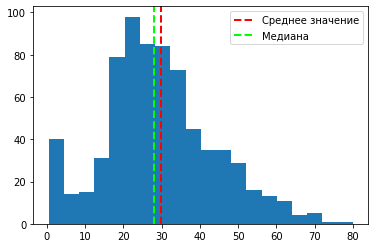

In [61]:
plt.hist(df['Age'], bins=20)
plt.axvline(df['Age'].mean(), color='r', linestyle = 'dashed', linewidth=2, label='Среднее значение')
plt.axvline(df['Age'].median(), color='lime', linestyle = 'dashed', linewidth=2, label='Медиана')
plt.legend();

### Мода

**Мода** — это значение переменной с самой большой частотой, т.е. самое популярное значение переменной

<img src="https://www.litres.ru/pub/t/28731109.json/i_002.jpg" width=700>

*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

In [ ]:
df['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

In [2]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

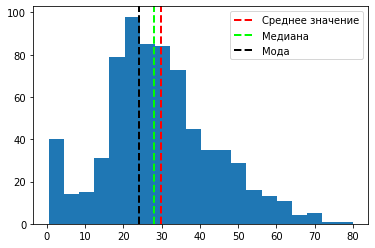

In [73]:
plt.hist(df['Age'], bins=20)
plt.axvline(df['Age'].mean(), color='r', linestyle = 'dashed', linewidth=2, label='Среднее значение')
plt.axvline(df['Age'].median(), color='lime', linestyle = 'dashed', linewidth=2, label='Медиана')
plt.axvline(df['Age'].mode()[0], color='black', linestyle = 'dashed', linewidth=2, label='Мода')
plt.legend();

## **Меры разброса (вариативности)**

**Меры вариативности (разброса)** - это оценка того, насколько данные разбросаны относительно меры центральной тенденции

Выбирайте метрику в пару той мере центральной тенденции, которую вы используете

### Размах

**Размах** — это разница между самым большим и самым маленьким значением переменной

<img src="https://www.litres.ru/pub/t/28731109.json/i_008.jpg">

*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

In [ ]:
df['Age'].max() - df['Age'].min()

79.58

Амплитуда изменения возраста в данных равна 79.58

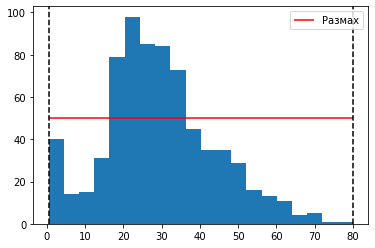

In [110]:
fig = plt.figure()
plt.hist(df['Age'], bins=20)
plt.axvline(df['Age'].max(), color='black', linestyle='dashed')
plt.axvline(df['Age'].min(), color='black', linestyle='dashed')
plt.hlines(y = 50, color='r', xmin=0.42, xmax=80, label='Размах')
plt.legend(loc=1);

### Дисперсия `.var()`

**Дисперсия** — среднее квадратов отклонений от среднего арифметического распределения

**Что [показывает](https://blog.skillfactory.ru/glossary/dispersiya/) дисперсия** \
Если говорить о всей выборке, дисперсия показывает, насколько разнородны результаты. Например, в одной группе почти все — шатены. В другой половина — шатены, а остальные — блондины, рыжие и брюнеты. Вторая группа более разнородная, в ней выше дисперсия.

Более близкие к реальному миру примеры: 

* бизнесу дисперсия поможет рассчитать разброс между доходами за разные месяцы;
* ученый с помощью дисперсии поймет, насколько совпадают между собой результаты серии экспериментов.

Еще дисперсия показывает вероятность того, что конкретный результат будет далек от среднего. Например, средний рост россиянина мужского пола — 175 см. Но если остановить на улице случайного мужчину, вряд ли он окажется ровно 175 см ростом — скорее всего, выше или ниже. Дисперсия высокая — вероятность встретить «не среднее» значение выше.

<img src = "https://www.litres.ru/pub/t/28731109.json/i_009.jpg">

Отклонения берутся в квадрат (Это происходит, поскольку одни отклонения являются положительными (когда Барсик больше среднего), а другие – отрицательными (когда Барсик меньше среднего))

<img src="https://www.litres.ru/pub/t/28731109.json/i_011.jpg">

*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

In [ ]:
df["Age"].var()

211.01912474630802

### Среднеквадратичное отклонение `.std()`

**Среднеквадратичное отклонение** (стандартное отклонение) — квадратный корень дисперсии. Мера, которая определяет среднее отклонение от среднего арифметического распределения

Квадрат в формуле дисперсии делает дисперсию очень неудобной для оценки разнообразия котиков: если мы измеряли размер в сантиметрах, то дисперсия имеет размерность в квадратных сантиметрах. Поэтому для удобства использования дисперсию берут под корень, получая по итогу показатель, называемый среднеквадратическим отклонением.

<img src="https://www.litres.ru/pub/t/28731109.json/i_012.jpg">

*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

In [ ]:
df["Age"].std()

14.526497332334042

В среднем возраст пассажиров Титаника отклоняется от среднего возраста пассажиров на 14.5 лет

## **Распределение данных**

### Нормальное распределение

Среднее значение и среднеквадратическое отклонение очень часто совместно используются для описания той или иной группы котиков. Дело в том, что, как правило, большинство (а именно около 68 %) котиков находится в пределе одного среднеквадратического отклонения от среднего. Эти котики обладают так называемым нормальным размером. Оставшиеся 32 % либо очень большие, либо очень маленькие. В целом же для большинства котиковых признаков картина выглядит вот так. Такой график называется нормальным распределением признака.

<img src="https://www.litres.ru/pub/t/28731109.json/i_013.jpg">


*Источник: https://www.litres.ru/book/vladimir-savelev-10569666/statistika-i-kotiki-28731109/chitat-onlayn/*

+ **Медиана** и **среднее арифметическое, мода** **равны** или почти равны

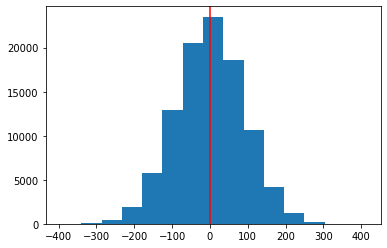

Свойство нормального распределения:

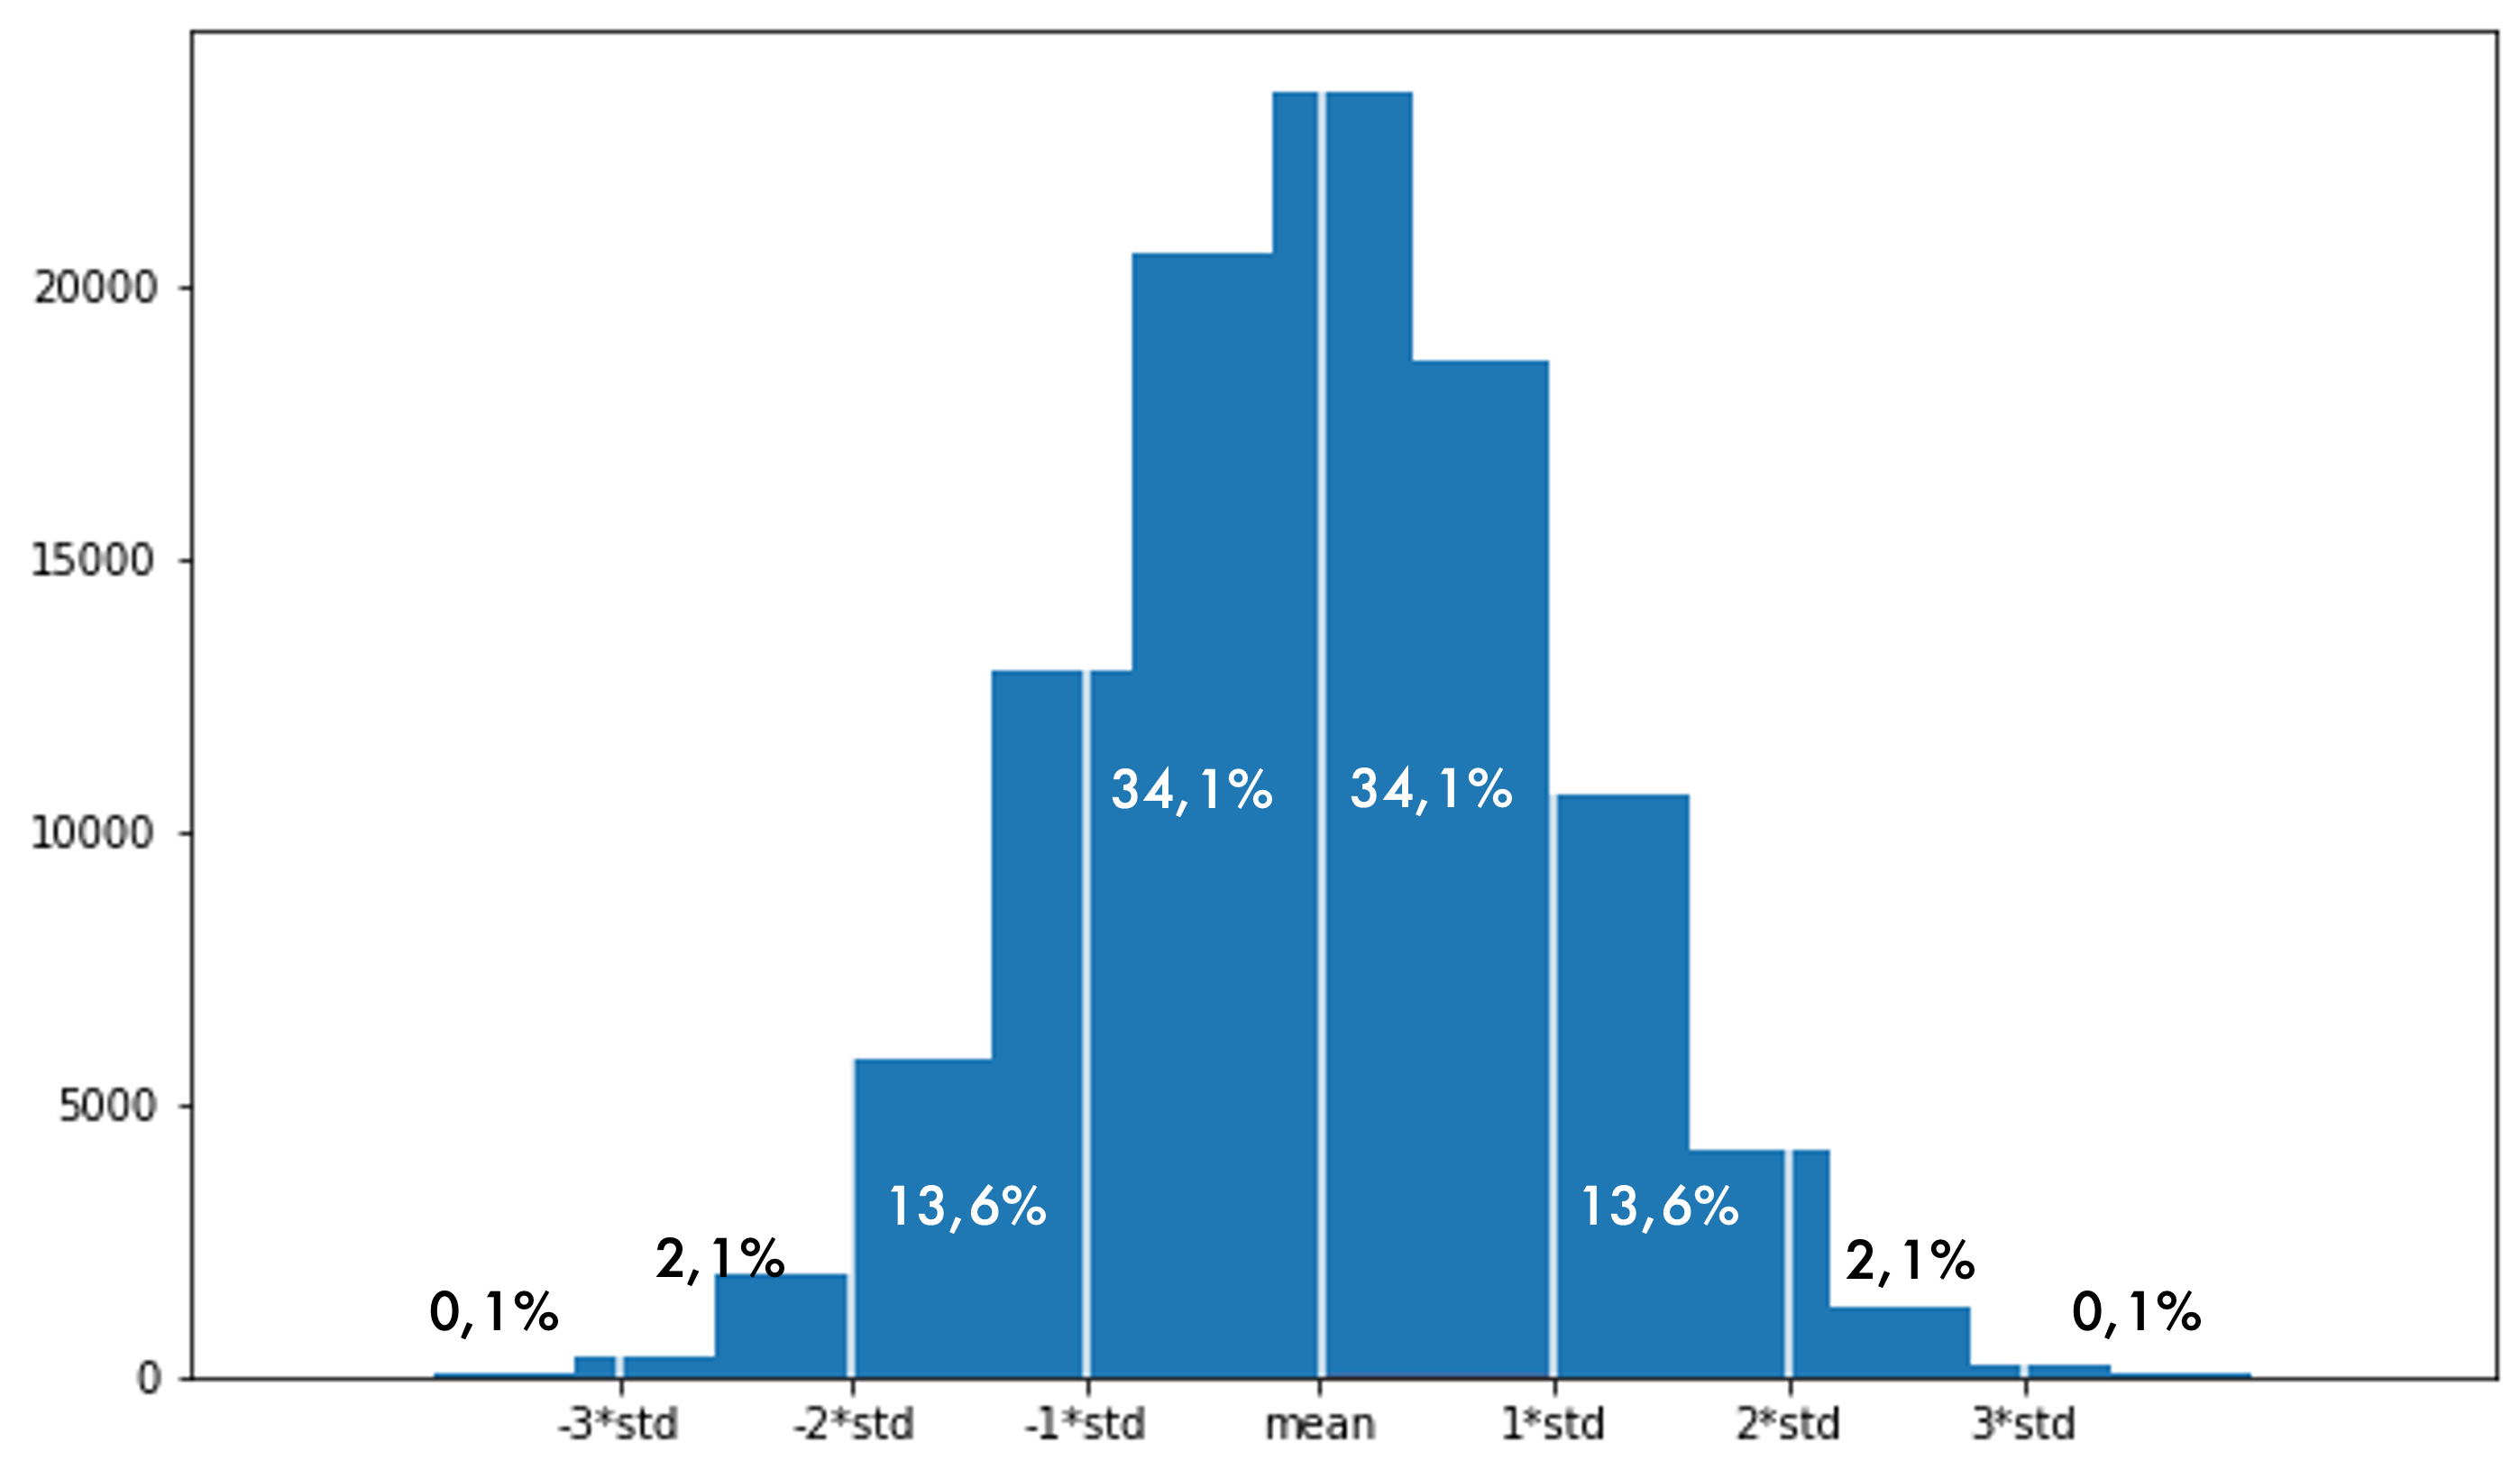

### Несимметричные распределения

+ Если **среднеe арифметическоe** значительно **меньше** **медианы**, это свидетельствует об экстремально низких значениях в данных

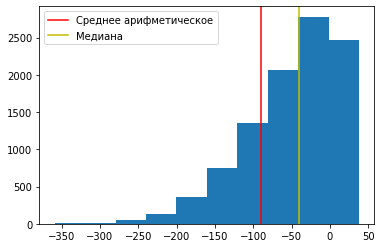

+ Если **среднеe арифметическоe** значительно **больше** **медианы**, это свидетельствует о наличии экстремально высоких значениях в данных

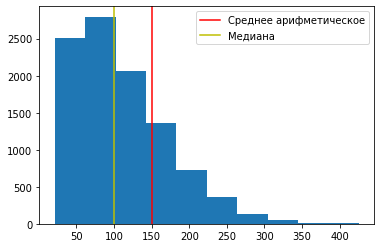